# Визуализация данных

Визуализация данных - первый шаг в решении практически любой задачи анализа данных, в частности, при участии в соревновании. Визуализация помогает решить, какую предобработку данных нужно провести, какие методы лучше использовать для предсказания, какие признаки добавить. В данном ноутбуке рассматривается работа с данными [kaggle-соревнования](https://www.kaggle.com/c/prudential-life-insurance-assessment), завершившегося зимой 2016 года. 

__Задача соревнования:__ по характеристикам человека и его заявки на медицинскую страховку предсказать степень риска, характерную для данной страховки.

__Задачи данного ноутбука:__
* рассматреть данные;
* показать разные методы визуализации;
* провести анализ графиков и сделать выводы, полезные для следующих этапов решения задачи.

Целевой признак (степень риска) в задаче номинальный: целые числа от 1 до 8, а метрика качества, предложенная организаторами соревнования, оценивает степень согласованности двух рейтингов. Поэтому задачу можно решать и методами классификации, и методами регрессии (в последнем случае придется округлять предсказания). Это стоит учитывать при анализе результатов визуализации.

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [19]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

__Считываем данные:__

In [5]:
data = pd.read_csv("train.csv", na_values="NaN")

In [6]:
data.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

Мы можем посмотреть описание признаков на [странице с данными](https://www.kaggle.com/c/prudential-life-insurance-assessment/data).

Создадим три списка признаков, соответствующие их группам: вещественные, целочисленные и категориальные (эти списки даны на странице соревнования). Уберем признак Id, так как он не несет смысловой нагрузки. 

Если бы типы признаков были не даны, нам бы пришлось вручную просматривать все 128 признаков, чтобы понять, какие значения они принимают.

In [8]:
real_features = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", 
                 "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                 "Insurance_History_5", "Family_Hist_2", "Family_Hist_3",
                 "Family_Hist_4", "Family_Hist_5"]
discrete_features = ["Medical_History_1", "Medical_History_10", "Medical_History_15", 
                     "Medical_History_24", "Medical_History_32"]
cat_features = data.columns.drop(real_features).drop(discrete_features)\
                   .drop(["Id", "Response"]).tolist()

## Первичный анализ

__Выведем статистики вещественных и целочисленных признаков:__

In [9]:
data[real_features].describe()

Product_Info_4       Ins_Age            Ht            Wt           BMI  \
count    59381.000000  59381.000000  59381.000000  59381.000000  59381.000000   
mean         0.328952      0.405567      0.707283      0.292587      0.469462   
std          0.282562      0.197190      0.074239      0.089037      0.122213   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.076923      0.238806      0.654545      0.225941      0.385517   
50%          0.230769      0.402985      0.709091      0.288703      0.451349   
75%          0.487179      0.567164      0.763636      0.345188      0.532858   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       59362.000000       52602.000000       48527.000000   
mean            0.077582           0.006283           0.361469   
std             0.082347           0.032816           0.349551   
min             0.000000           0.000000           0.000000   
25%             0.035000           0.000000           0.060000   
50%             0.060000           0.000000           0.250000   
75%             0.100000           0.000000           0.550000   
max             1.000000           1.000000           1.000000   

       Insurance_History_5  Family_Hist_2  Family_Hist_3  Family_Hist_4  \
count         33985.000000   30725.000000   25140.000000   40197.000000   
mean              0.001733       0.474550       0.497737       0.444890   
std               0.007338       0.154959       0.140187       0.163012   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000400       0.362319       0.401961       0.323944   
50%               0.000973       0.463768       0.519608       0.422535   
75%               0.002000       0.579710       0.598039       0.563380   
max               1.000000       1.000000       1.000000       0.943662   

       Family_Hist_5  
count   17570.000000  
mean        0.484635  
std         0.129200  
min         0.000000  
25%         0.401786  
50%         0.508929  
75%         0.580357  
max         1.000000

In [10]:
data[discrete_features].describe()

Medical_History_1  Medical_History_10  Medical_History_15  \
count       50492.000000          557.000000        14785.000000   
mean            7.962172          141.118492          123.760974   
std            13.027697          107.759559           98.516206   
min             0.000000            0.000000            0.000000   
25%             2.000000            8.000000           17.000000   
50%             4.000000          229.000000          117.000000   
75%             9.000000          240.000000          240.000000   
max           240.000000          240.000000          240.000000   

       Medical_History_24  Medical_History_32  
count         3801.000000         1107.000000  
mean            50.635622           11.965673  
std             78.149069           38.718774  
min              0.000000            0.000000  
25%              1.000000            0.000000  
50%              8.000000            0.000000  
75%             64.000000            2.000000  
max            240.000000          240.000000

In [11]:
data.shape

(59381, 128)

In [12]:
real_features_na = data[real_features].isna().sum()
discrete_features_na = data[discrete_features].isna().sum()
print(color.BOLD + 'Список вещественных признаков без пропусков:\n' + color.END, 
      ', '.join(real_features_na[real_features_na == 0].index))
print(color.BOLD + 'Список целочисленных признаков без пропусков:\n' + color.END, 
      ', '.join(discrete_features_na[discrete_features_na == 0].index))

Список вещественных признаков без пропусков:
 Product_Info_4, Ins_Age, Ht, Wt, BMI
Список целочисленных признаков без пропусков:
 


In [13]:
print(color.BOLD + 'Список вещественных признаков, значение которых известно менее, чем для половины объектов:\n' + color.END, 
      ', '.join(real_features_na[real_features_na >= data.shape[0]//2].index))
print(color.BOLD + 'Список целочисленных признаков, значение которых известно менее, чем для половины объектов:\n' + color.END, 
      ', '.join(discrete_features_na[discrete_features_na  >= data.shape[0]//2].index))

Список вещественных признаков, значение которых известно менее, чем для половины объектов:
 Family_Hist_3, Family_Hist_5
Список целочисленных признаков, значение которых известно менее, чем для половины объектов:
 Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32


In [14]:
real_features_max = data[real_features].describe().loc[['max']].to_numpy()
real_features_min = data[real_features].describe().loc[['min']].to_numpy()
print(color.BOLD + 'Количество пар вещественных признаков с отличными максимумами:\n' + color.END,
      np.sum(real_features_max > 2*real_features_max.T))
print(color.BOLD + 'Количество пар вещественных признаков с отличными минимумами:\n' + color.END,
      np.sum(real_features_min > 2*real_features_min.T))

discrete_features_max = data[discrete_features].describe().loc[['max']].to_numpy()
discrete_features_min = data[discrete_features].describe().loc[['min']].to_numpy()
print(color.BOLD + 'Количество пар целочисленных признаков с отличными максимумами:\n' + color.END,
      np.sum(discrete_features_max > 2*discrete_features_max.T))
print(color.BOLD + 'Количество пар целочисленных признаков с отличными минимумами:\n' + color.END,
      np.sum(discrete_features_min > 2*discrete_features_min.T))

Количество пар вещественных признаков с отличными максимумами:
 0
Количество пар вещественных признаков с отличными минимумами:
 0
Количество пар целочисленных признаков с отличными максимумами:
 0
Количество пар целочисленных признаков с отличными минимумами:
 0


___
    
   __В данных есть пропуски.__
   
   __Список вещественных признаков без пропусков:__ `Product_Info_4, Ins_Age, Ht, Wt, BMI`
    
   __Все целочисленные признаки с пропусками.__  
   
___

    
   __Список вещественных признаков, значение которых известно менее, чем для половины объектов:__
   `Family_Hist_3, Family_Hist_5`
   
   __Список целочисленных признаков, значение которых известно менее, чем для половины объектов:__
   `Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32`
___

    
   __Масштаб вещественных и целочисленных признаков одинаков.__
   
   __Все признаки нормированы (как и сказанно на странице с данными).__

___

Мы видим, что в датасете есть признаки, которые не известны почти для всех объектов. Кроме того, легко проверить, что в выборке нет объектов, для которых известны все признаки, даже если рассматривать только вещественные. Значит, при решении задачи нужно было бы использовать более сложные методы обработки пропусков, чем удаление объектов.

__Построим гистограммы вещественных и целочисленных признаков.__

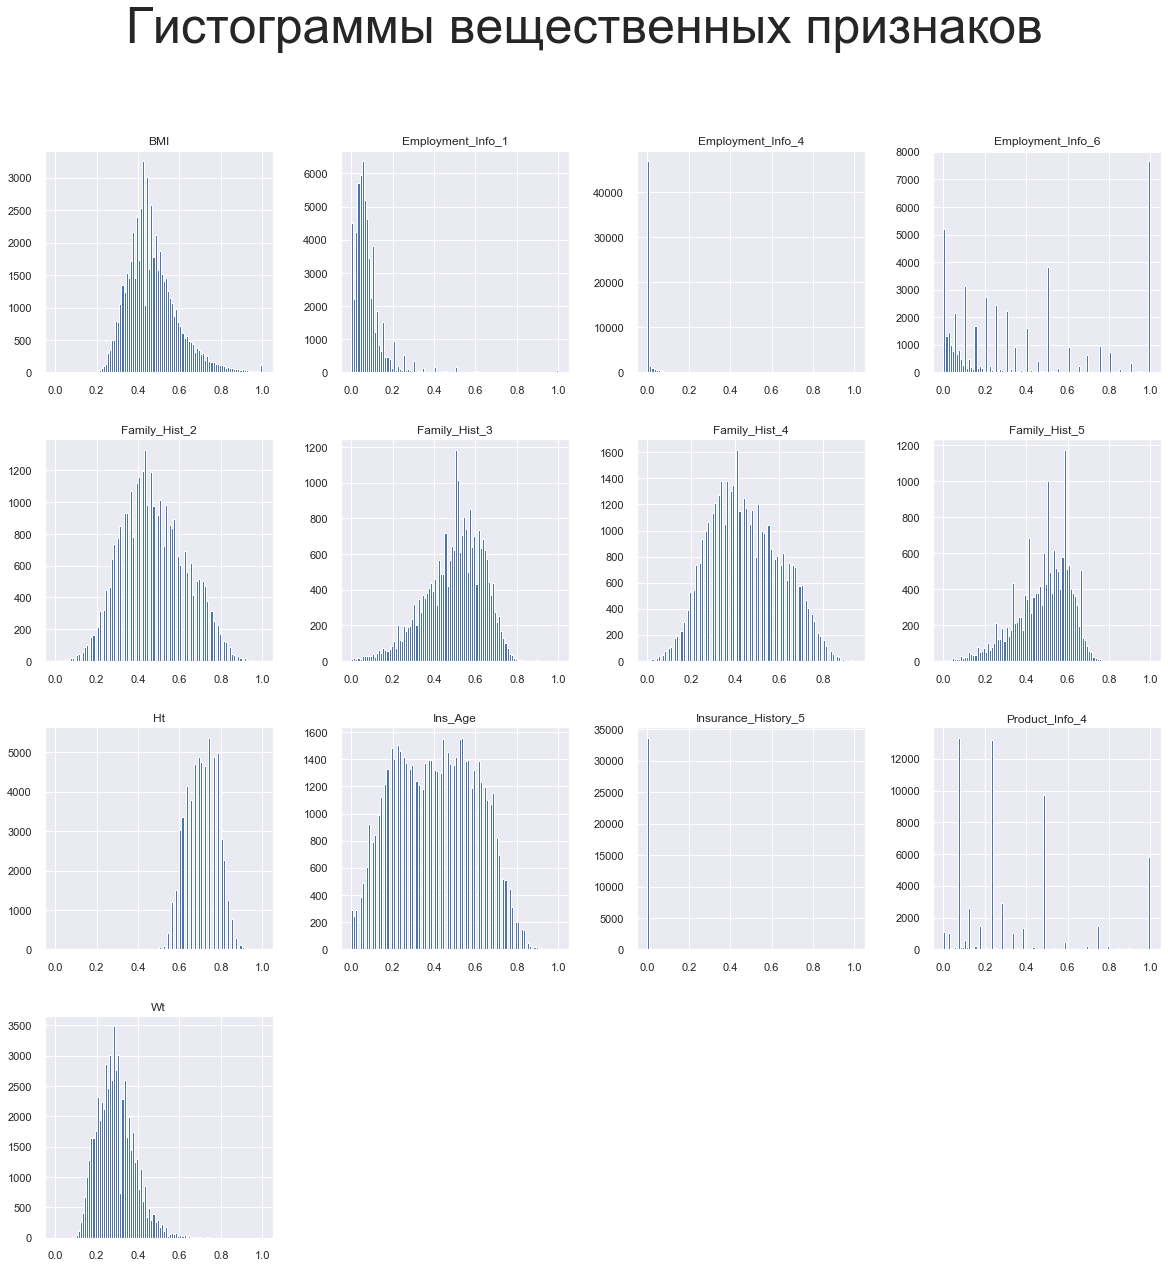

In [24]:
sns.set_context('notebook')
fig = plt.figure(figsize = (20, 20))
ax = fig.gca()
data[real_features].hist(bins=100, ax=ax)
plt.suptitle('Гистограммы вещественных признаков', fontsize=50);

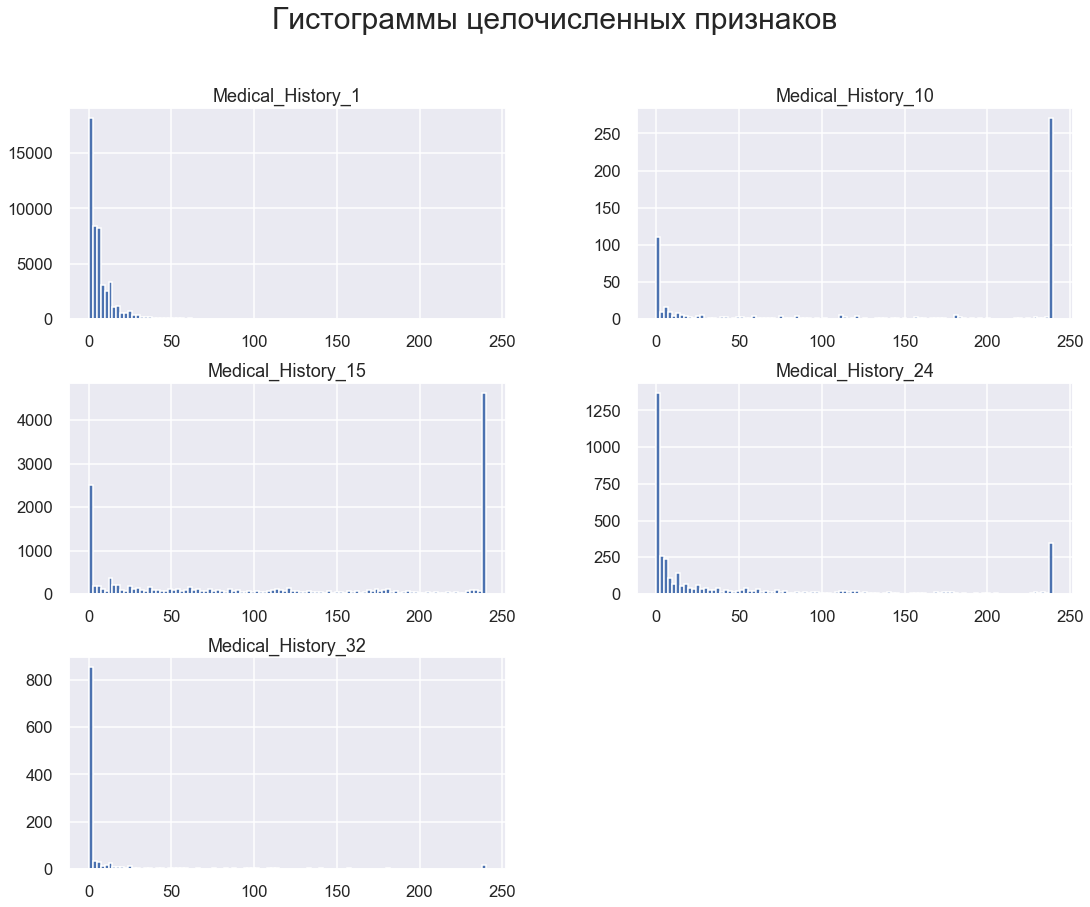

In [29]:
sns.set_context('talk')
fig = plt.figure(figsize = (18, 14))
ax = fig.gca()
data[discrete_features].hist(bins=100, ax=ax)
plt.suptitle('Гистограммы целочисленных признаков', fontsize=30);

In [30]:
print(color.BOLD + 'Мощности множеств значений вещественных признаков:\n' + color.END,
      data[real_features].apply(lambda x: len(x.unique())))
print(color.BOLD + 'Мощности множеств значений целочисленных признаков:\n' + color.END,
      data[discrete_features].apply(lambda x: len(x.unique())))

Мощности множеств значений вещественных признаков:
 Product_Info_4         1491
Ins_Age                  65
Ht                       39
Wt                      300
BMI                    3256
Employment_Info_1      1937
Employment_Info_4       872
Employment_Info_6       993
Insurance_History_5    2266
Family_Hist_2            69
Family_Hist_3            91
Family_Hist_4            69
Family_Hist_5            91
dtype: int64
Мощности множеств значений целочисленных признаков:
 Medical_History_1     172
Medical_History_10    104
Medical_History_15    242
Medical_History_24    228
Medical_History_32     96
dtype: int64


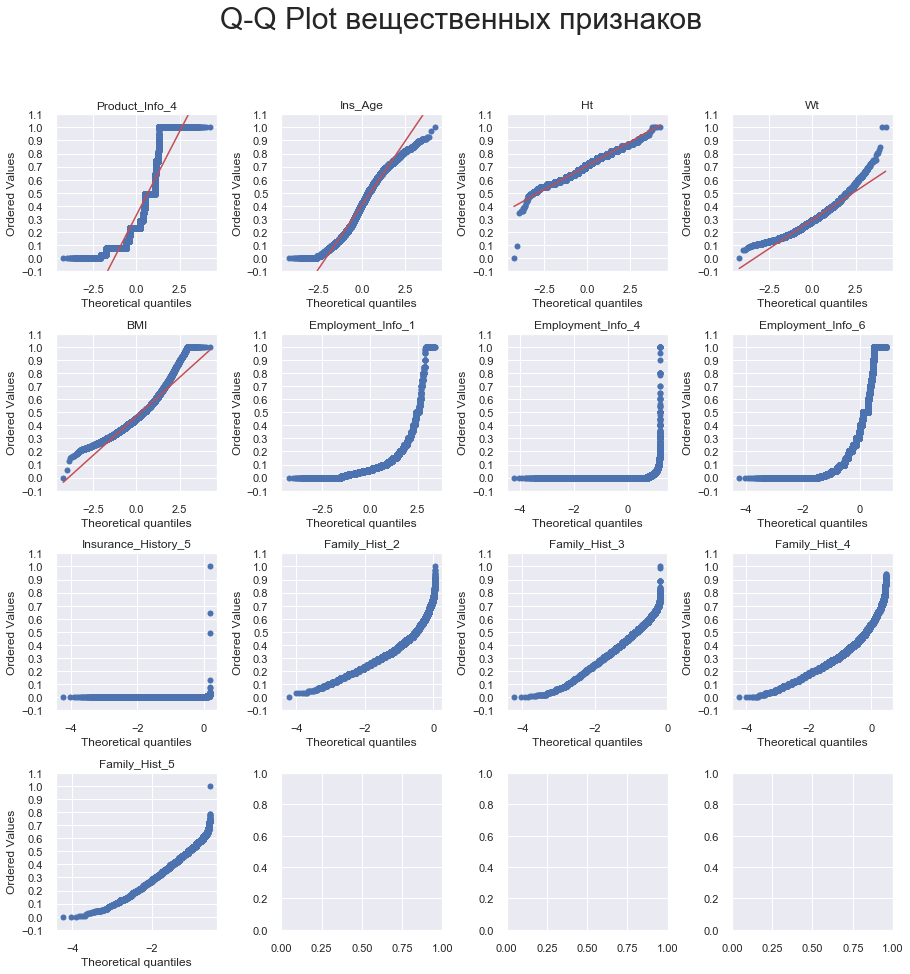

In [32]:
import scipy.stats as stats

sns.set_context('notebook')
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Q-Q Plot вещественных признаков', fontsize=30);

for i, col in enumerate(data[real_features]):
    axs[i // 4][i % 4].set_yticks(np.arange(-0.1, 1.1, step=0.1))
    stats.probplot(data[col], dist="norm", plot=axs[i // 4][i % 4])
    axs[i // 4][i % 4].set_title(col)
    axs[i // 4][i % 4].set_ylim(-0.1, 1.1)

plt.show();

___    
    
   __Cреди вещественных и целочисленных признаков нет константных. 
   По графикам может показаться, что `Employment_Info_4, Insurance_History_5, Medical_History_32` являются константными, однако, их мощность больше 1, следовательно, они константными не являются.__
 
   
___

   __Если смотреть только на гистограммы распределений вещественных признаков, то можно заменить, что не все из них имеют распределение, похожее на нормальное. Признаки `Employment_Info_4, Employment_Info_6, Insurance_History_5, Product_Info_4` сильнее всего отличаются от нормального распределения. Это можно заметить и по графикам Q-Q Plot, которые показывают отклонения теоретической плотности (в данном случае в качестве теоретической плотности выступает нормальное распределение) от практической. Больше всего на нормальное распределение похоже распределение признаков `Wt, Ht, Ins_Age`. Это же мы видим и на графиках Q-Q Plot, хотя `Ins_Age` скорее бимодальное.__
    
   
   
___

Среди вещественных есть признаки с очень большим перекосом в сторону какого-то одного значения (например, Employmennt_Info_4), возможно, их стоило бы прологарифмировать при решении задачи. Кроме того, есть признаки со сложной структурой гистограммы. 
Распределения целочисленных признаков (относящихся к группе медицинских) имеют схожую структуру. 

В целом данные разнородны, и описать их одним вероятностным распределением непросто. 

__Теперь визуализируем признаки попарно__
__Построим scatterplot для пар вещественных признаков.__

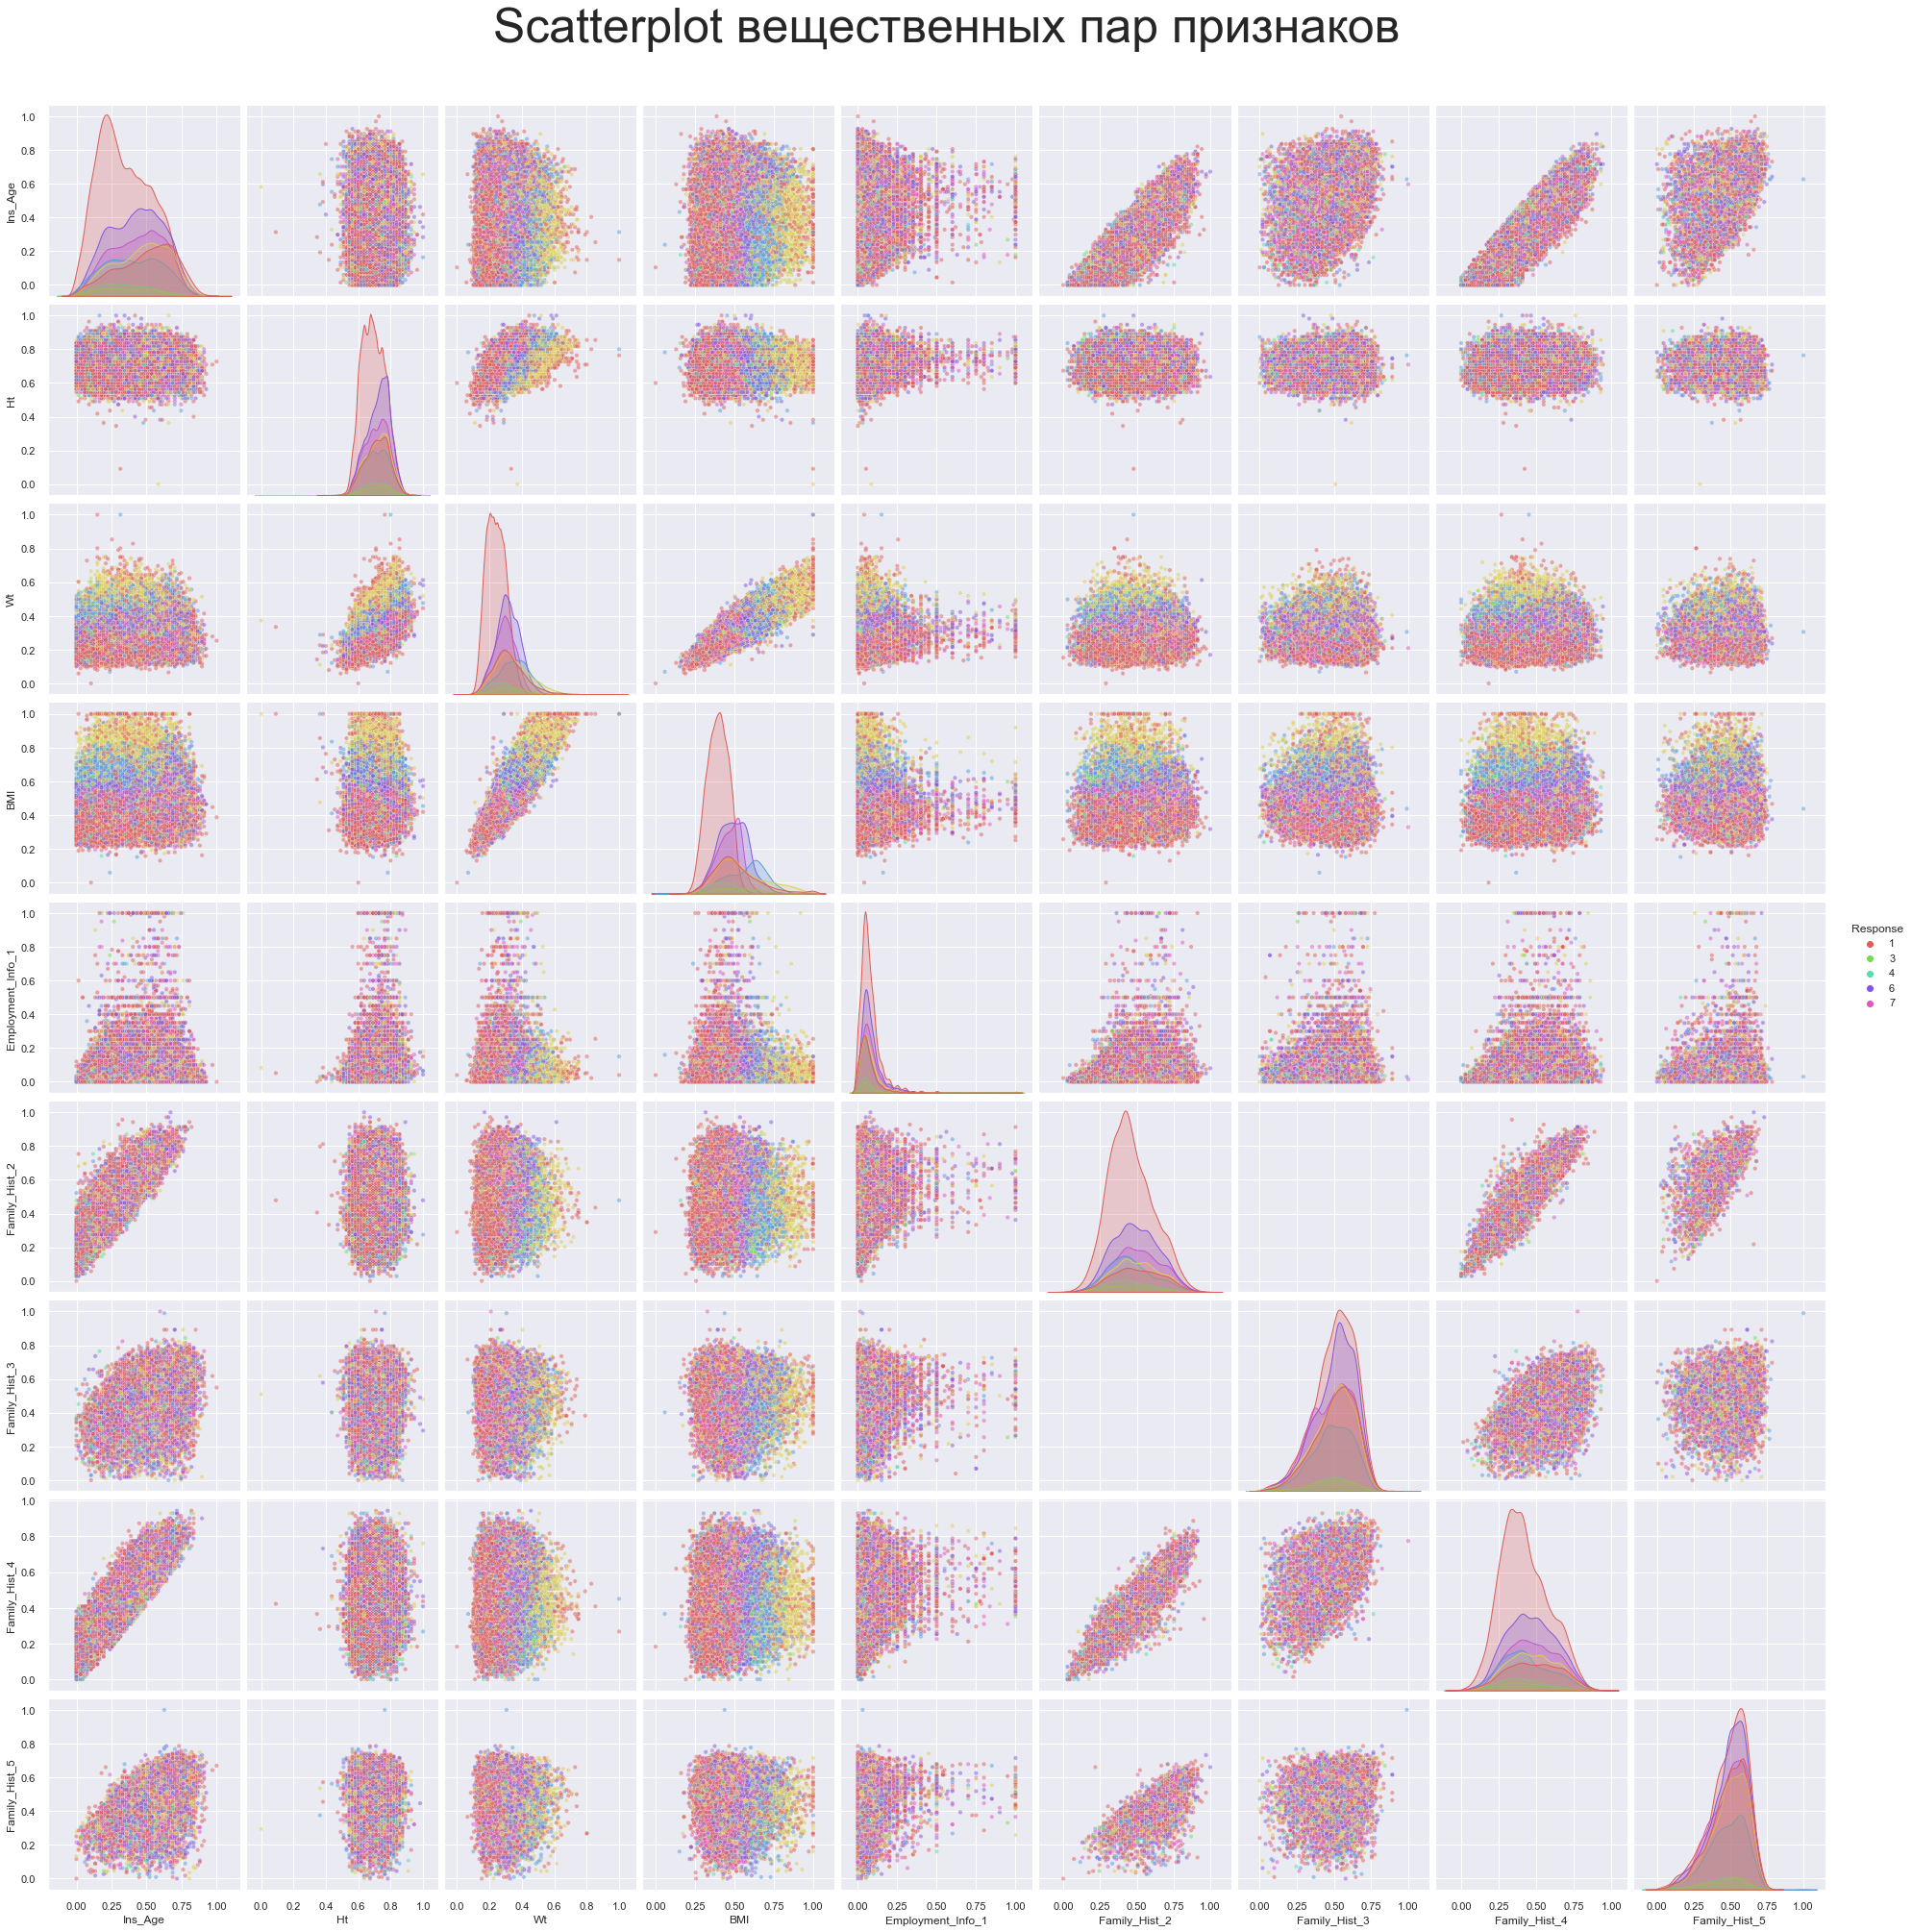

In [33]:
pairplot_data = data[real_features+["Response"]]\
                 .drop(["Employment_Info_4", "Employment_Info_6",
                        "Insurance_History_5", "Product_Info_4"], axis=1)
columns = list(pairplot_data.iloc[:, :-1].columns)
sns.pairplot(pairplot_data, palette='hls',
             hue='Response', diag_kind='kde', vars=columns[0:9], height=3,
             plot_kws = {'alpha': 0.5, 's': 20})\
            .fig.suptitle('Scatterplot вещественных пар признаков', y=1.04,
                          fontsize=50);

Классы накрывают друг друга, и графики не очень информативны. Но они позволяют ответить на некоторые вопросы о взаимоотношениях признаков и соотношений признаков и классов.

___

   __Есть графики, на которых виден не только последний класс, например, пара `(Ins_Age, BMI)`, но все равно классы так сильно накрывают друг друга, что трудно явно разделить их прямой. На графике можно найти и другие такие пары, но ситуация там точно такая же. Остальные же пары такие, что на них классы накрываются друг на друга полностью.__
___

   __Почти на каждом scatterplot можно найти хотя бы 1 выброс.__
___

В целом облака точек выглядят достаточно компактно (в неформальном понимании этого слова), их можно приблизить искривленным кругом.

__Построим такие же графики для целочисленных признаков.__

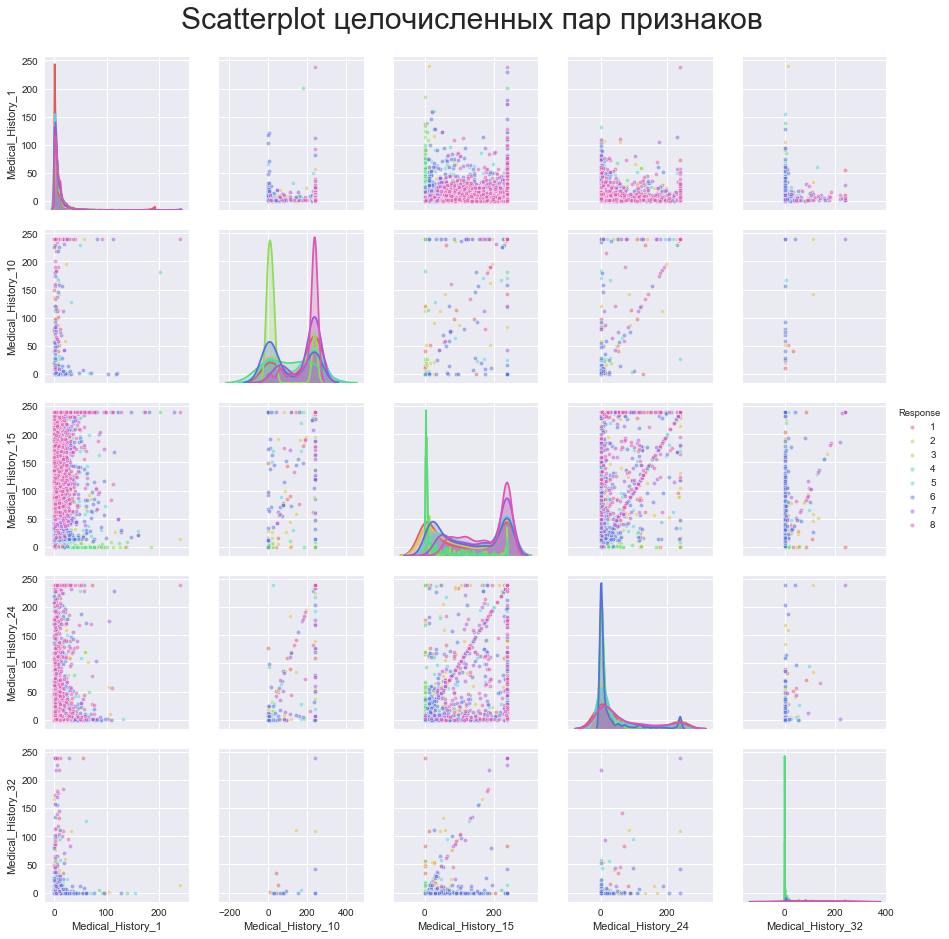

In [17]:
pairplot_data = data[discrete_features+["Response"]]
columns = list(pairplot_data.iloc[:, :-1].columns)
sns.pairplot(pairplot_data, palette='hls',
             hue='Response', diag_kind='kde', vars=columns[0:5],
             plot_kws = {'alpha': 0.5, 's': 20})\
            .fig.suptitle('Scatterplot целочисленных пар признаков', y=1.04, fontsize=30);

Графики выглядят еще менее информативно. Заметна тенденция, что пары признаков сконцентрированы либо на сторона квадрата [0, 240] x [0, 240], либо на его диагонали, то есть признаки как-то связаны.

__Посмотрим на корреляции признаков, чтобы узнать, не нужно ли удалять какие-то признаки перед (гипотетическим) построением модели.__

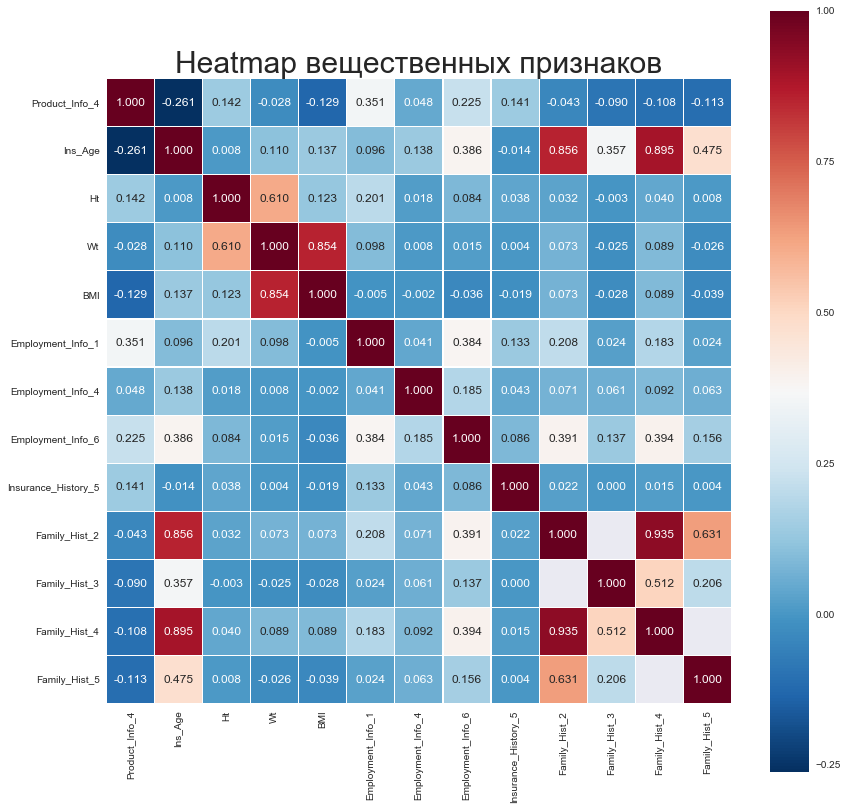

In [18]:
plt.figure(figsize=(14, 14))
sns.heatmap(data[real_features].corr(),  linewidths=.2,
            fmt='.3f', annot=True, cmap='RdBu_r', annot_kws={'size': 12},
            square=True).set_title('Heatmap вещественных признаков'
                                   fontsize=30);

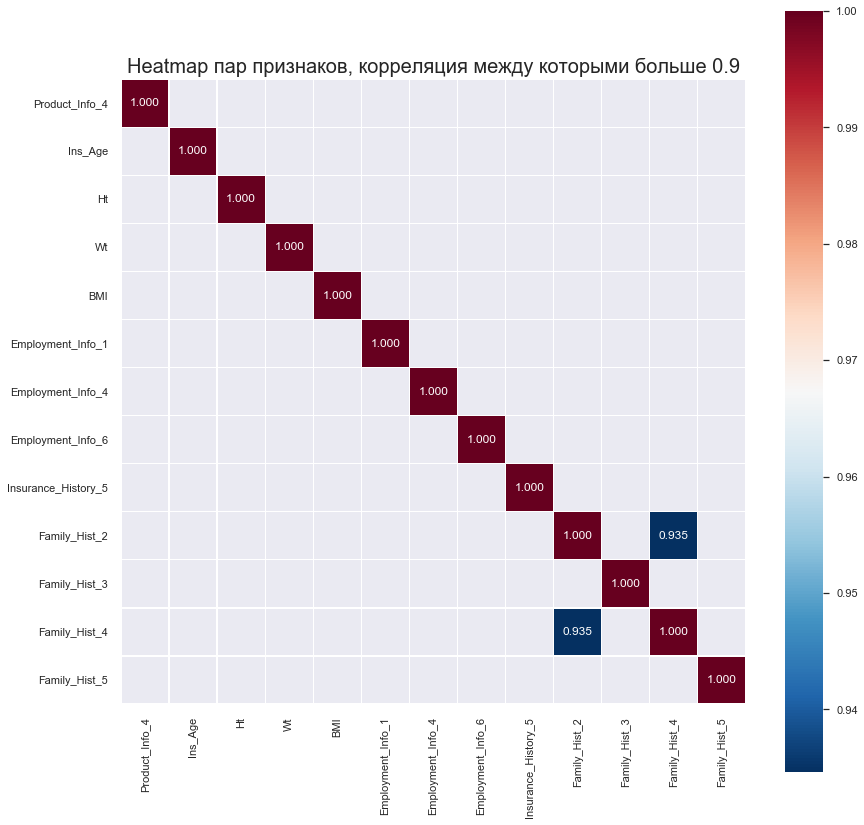

In [35]:
plt.figure(figsize=(14, 14))
sns.heatmap(data[real_features].corr(),  linewidths=.2,
            mask=(data[real_features].corr() < 0.9),
            fmt='.3f', annot=True, cmap='RdBu_r', annot_kws={'size': 12},
            square=True).set_title('Heatmap пар признаков, корреляция между которыми больше 0.9',
                                   fontsize=20);

___
  <font color="green">  
    __Есть пара, корреляция между которыми больше 0.9: `(Family_Hist_2, Family_Hist_4)`__    
  </font>
___

Перейдем к визуализации категориальных признаков.

__Посчитаем количество значений для каждого признака.__

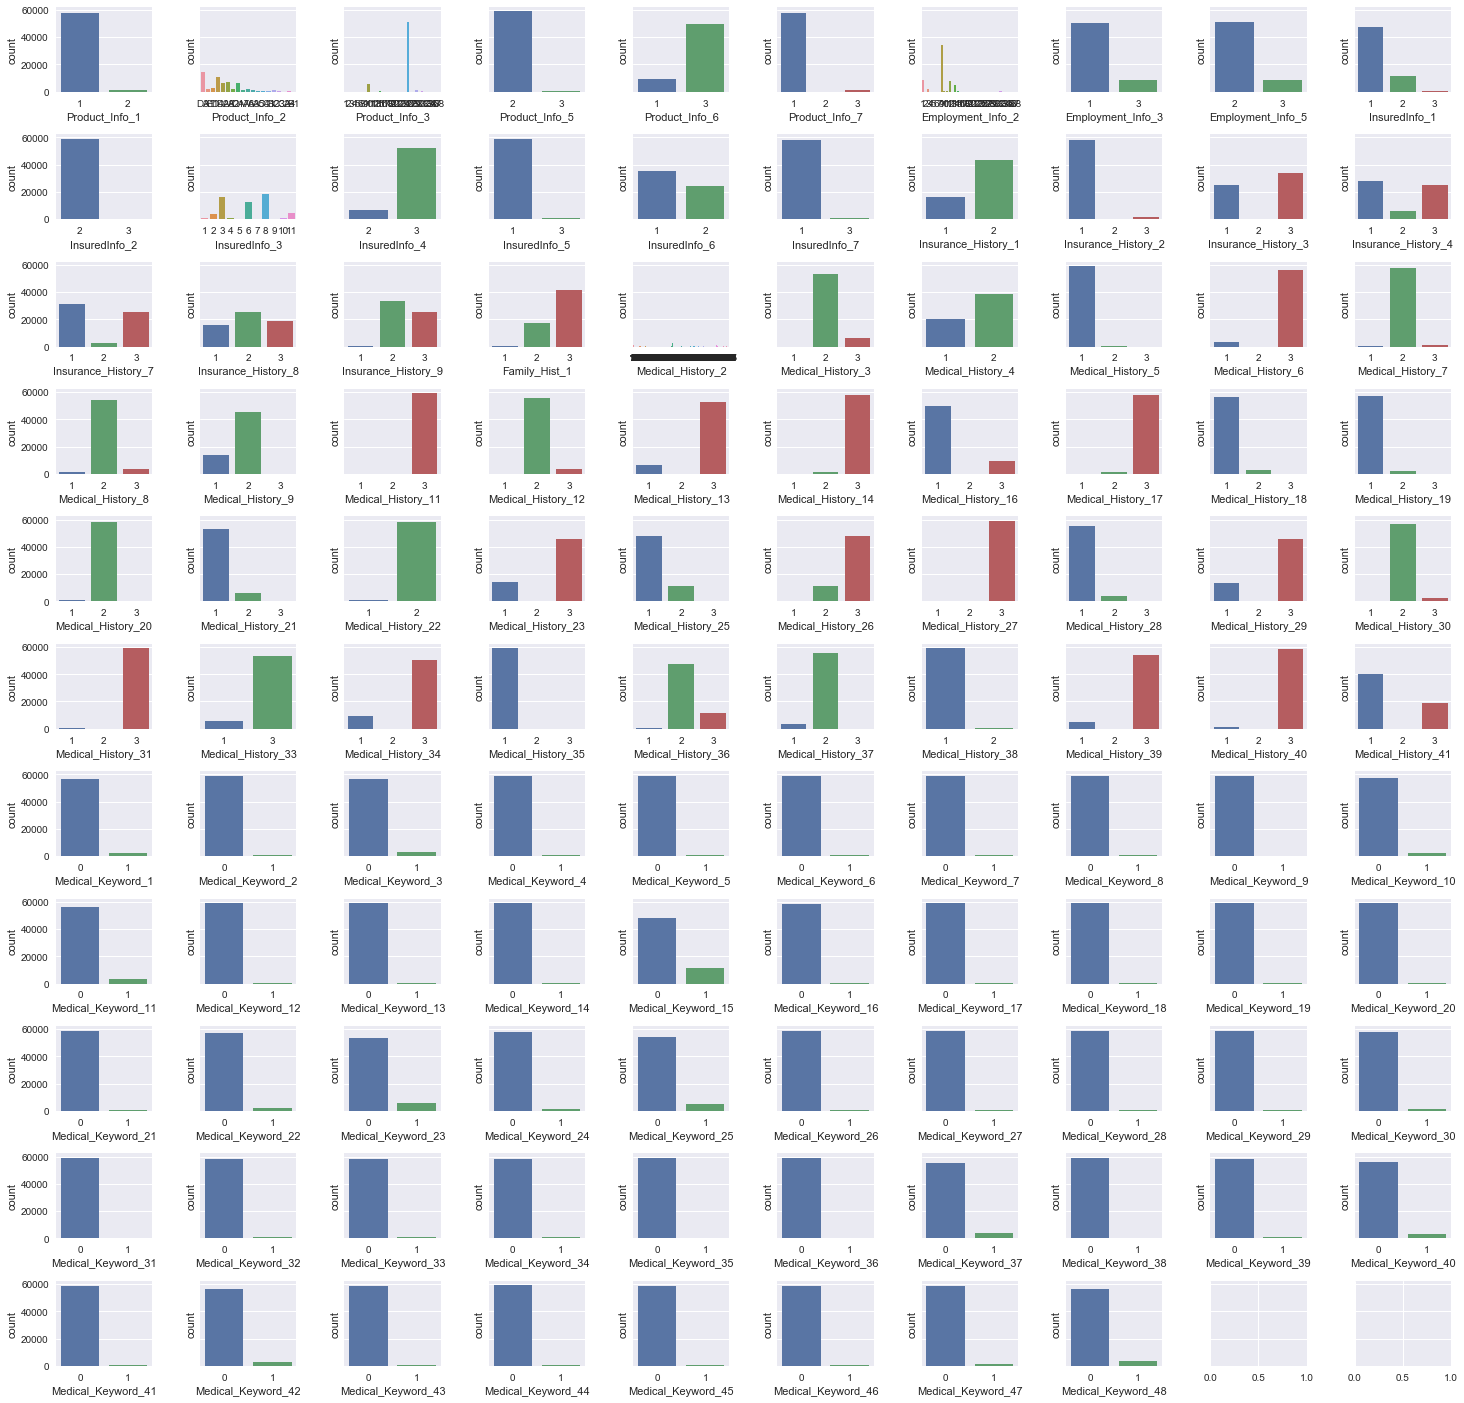

In [20]:
fig, axes = plt.subplots(11, 10, figsize=(25, 25), sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=data, ax=axes[i // 10, i % 10])

In [103]:
for col in data[cat_features]:
    print('Число значений признака {}{} - {}{}'.format(color.BOLD, col, 
                                                       len(data[col].unique()),
                                                       color.END))

Число значений признака Product_Info_1 - 2
Число значений признака Product_Info_2 - 19
Число значений признака Product_Info_3 - 34
Число значений признака Product_Info_5 - 2
Число значений признака Product_Info_6 - 2
Число значений признака Product_Info_7 - 3
Число значений признака Employment_Info_2 - 36
Число значений признака Employment_Info_3 - 2
Число значений признака Employment_Info_5 - 2
Число значений признака InsuredInfo_1 - 3
Число значений признака InsuredInfo_2 - 2
Число значений признака InsuredInfo_3 - 11
Число значений признака InsuredInfo_4 - 2
Число значений признака InsuredInfo_5 - 2
Число значений признака InsuredInfo_6 - 2
Число значений признака InsuredInfo_7 - 2
Число значений признака Insurance_History_1 - 2
Число значений признака Insurance_History_2 - 3
Число значений признака Insurance_History_3 - 3
Число значений признака Insurance_History_4 - 3
Число значений признака Insurance_History_7 - 3
Число значений признака Insurance_History_8 - 3
Число значений при

___    
   __Cреди категориальных признаков нет константных. Так как у каждого признака как минимум 2 возможные категории. Однако больше половины признаков принимают одно значение чаще, чем другое(ие) [они сильно перекошены в одну сторону].__
    
___  
   __На графике четко видно, что число значений признов `Product_Info_2, Product_Info_3, Employment_Info_2, InsuredInfo_3, Medical_History_2` больше 5, так как на оси абсцисс значения признаков накладываются друг на друга (в силу небольшого размера отдельно взятого графика). Также это показано и в ячейке выше.__
    
___

У нас есть много признаков с сильными перекосами в сторону отдельного признака. Учитывая, что среди категориальных признаков много медицинских показателей, можно предположить, что именно эти признаки сильно влияют на увеличение риска (целевой признак). Проверить это предположение можно, построив такие же countplot с разбивкой каждого значения дополнительно по классам (то есть у нас будет несколько групп столбиков, и в каждой группе их будет 8). Это можно сделать, указав параметр hue в этой функции аналогично тому, как мы это делали выше.

__Построим графики countplot для признаков 'Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45' (признаки выбраны случайно) с разбивкой по классам.__

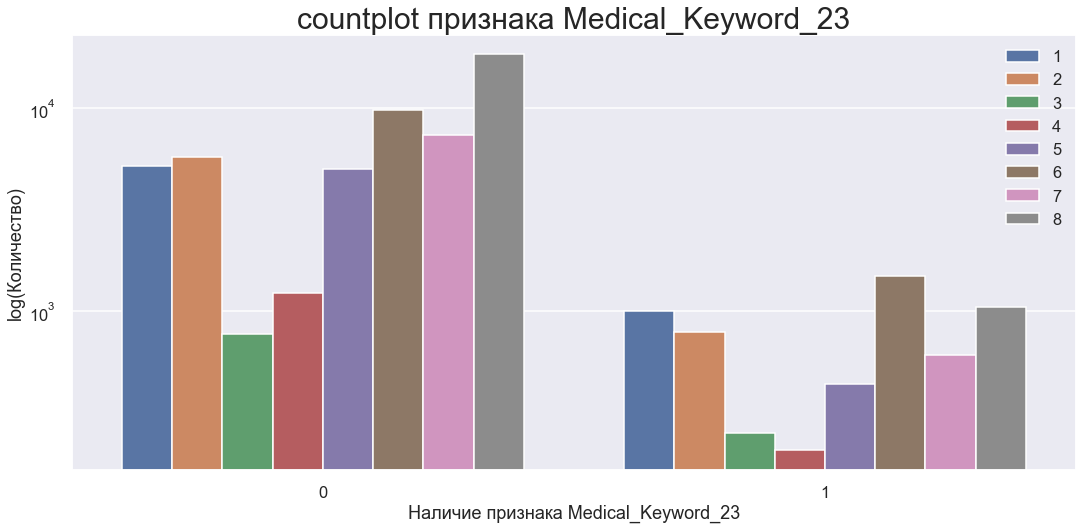

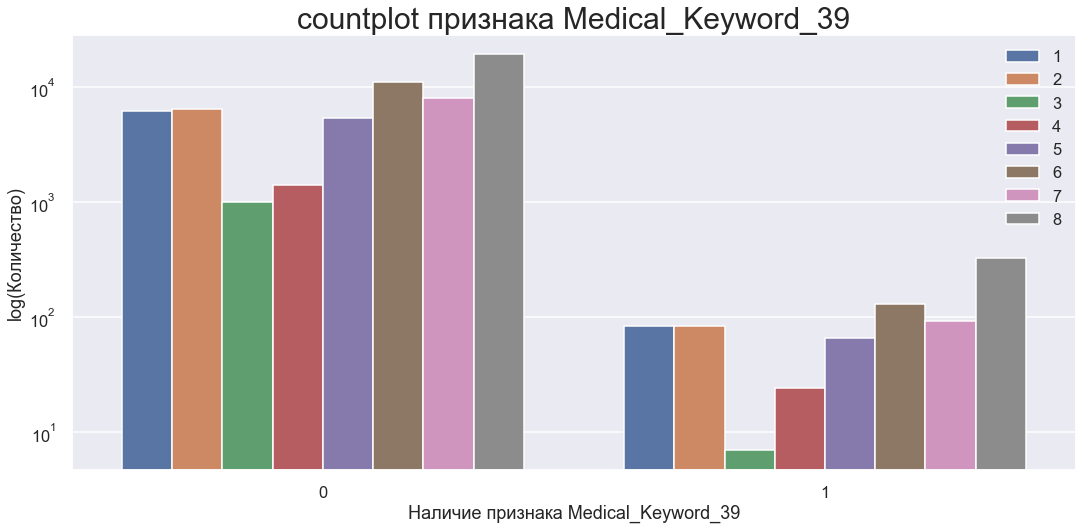

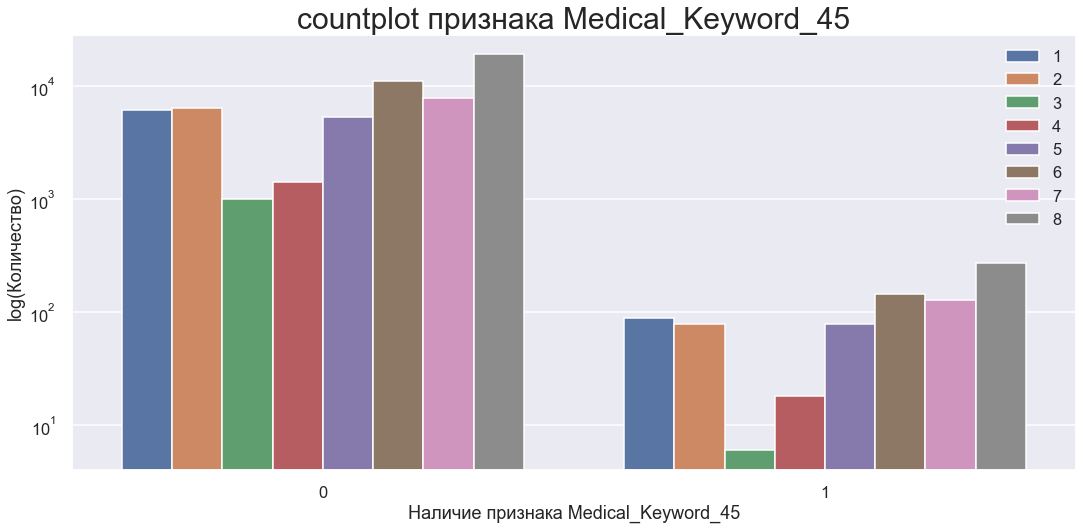

In [42]:
sns.set_context('talk')
for col in ['Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45']:
    plt.figure(figsize=(18, 8))
    g = sns.countplot(x=col, data=data, hue='Response')
    g.set_title('countplot признака ' + col, fontsize=30)
    g.set_yscale('log')
    plt.xlabel('Наличие признака ' + col)
    plt.ylabel('log(Количество)')
    plt.legend(loc=1)
    plt.show()

___
   __Наличие факторов `Medical_Keyword_39, Medical_Keyword_45` сильно повышают риск, так как, когда он равен 1, то отнесенных к категории риска 8 больше, чем для любой другой. Для фактора же `Medical_Keyword_23` ситуация немного иная: к категории 6 относется больше, чем к другим (при наличии данного фактора).[Для удобства взята логарифмическая шкала по оси ординат]__
   
  ___ 
  
  __Но все-таки однозначно говорить, что эти факторы повышают риск нельзя. На графиках видно, что как при наличии фактора, так и при его отсутсвии, распределение между категориями риска примерно одинаковое. И если посмотреть на распределение категорий риска, то можно понять, что данные категории не сбалансированы. Это видно из графика, представленного в следующей ячейке.__
___

__Посмотрим на распределение целевого признака, чтобы узнать, сбалансированы ли классы:__

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


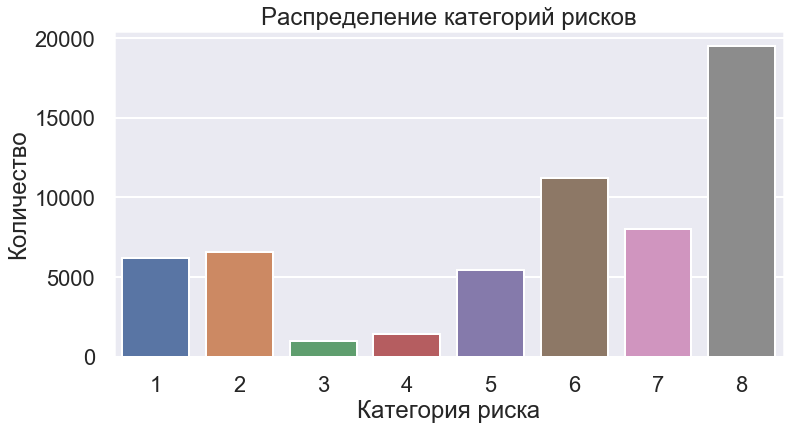

In [44]:
sns.set_context('poster')
plt.figure(figsize=(12, 6))
sns.countplot(data.Response).set_title('Распределение категорий рисков')
plt.xlabel('Категория риска')
plt.ylabel('Количество');

В категорию 8 люди попадают чаще, чем в другие категории.

## Визуализация с помощью понижения размерности

Далее можно воспользоваться средствами понижения размерности. Для задачи с дискретным целевым признаком это позволит понять, какие классы хорошо разделяются, а какие - нет.

In [23]:
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

In [24]:
sdata = shuffle(data, random_state=321)

Методы sklearn не принимают матрицы с пропусками (nan). Чтобы избежать этой проблемы, не будем рассматривать признаки, которые имеют много пропусков (последние четыре в списке вещественных признаков). Кроме того, ограничимся рассмотрением вещественных признаков.

In [25]:
subset_l  = 2000
selected_features = real_features[:-4]
objects_with_nan = sdata.index[np.any(np.isnan(sdata[selected_features].values), axis=1)]   
data_subset = scale(sdata[selected_features].drop(objects_with_nan, axis=0)[:subset_l])
response_subset = sdata["Response"].drop(objects_with_nan, axis=0)[:subset_l]

Будем строить визуализацию методами: t-SNE и MDS.

In [26]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [27]:
tsne_representation = TSNE(random_state=321).fit_transform(data_subset)

Визуализируем полученное представление. Для этого создадим набор цветов по количеству классов, а затем в цикле по классам будем отображать представления точек, относящихся к этому классу. Будем указывать параметр `alpha=0.5`, чтобы сделать точки полупрозрачными, это лучше в ситуации, когда точки накладываются.

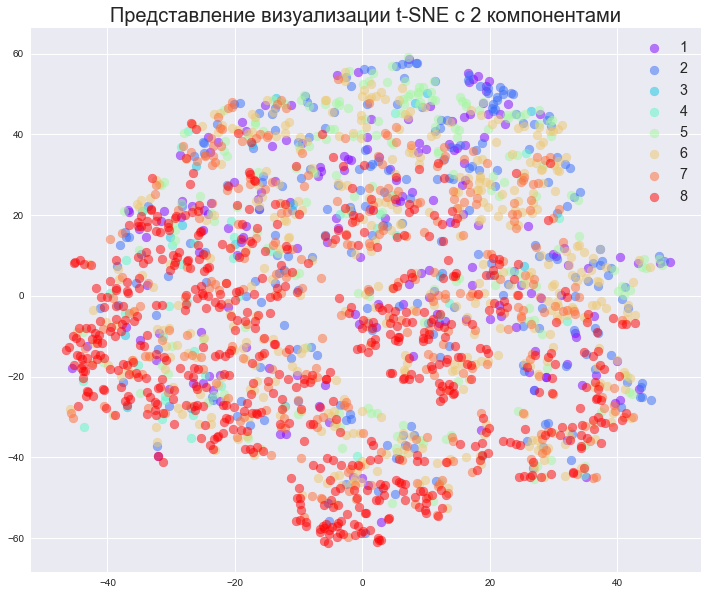

In [34]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
plt.figure(figsize=(12, 10))
plt.title('Представление визуализации t-SNE с 2 компонентами', fontsize=20)
for y, c in zip(set(data.Response), colors):
    plt.scatter(tsne_representation[response_subset.values==y, 0], 
                tsne_representation[response_subset.values==y, 1], 
                c=c.reshape(1,-1), alpha=0.5, label=str(y), s=80)
plt.legend(fontsize='x-large');

Теперь сделаем то же с MDS.

In [29]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

In [30]:
MDS_transformed = MDS(random_state=321).fit_transform(data_subset)

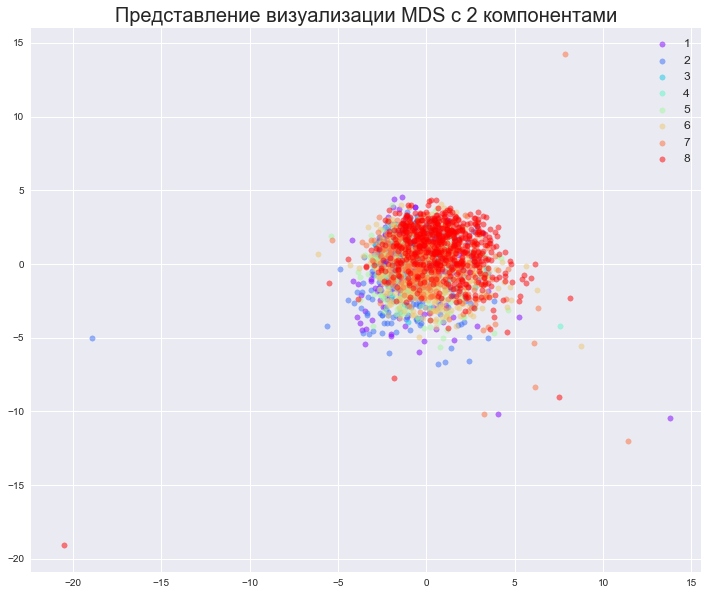

In [31]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
plt.figure(figsize=(12, 10))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed[response_subset.values==y, 0], 
                MDS_transformed[response_subset.values==y, 1], 
                c=c.reshape(1,-1), alpha=0.5, label=str(y), s=30)
plt.title('Представление визуализации MDS с 2 компонентами', fontsize=20)
plt.legend(fontsize='large');

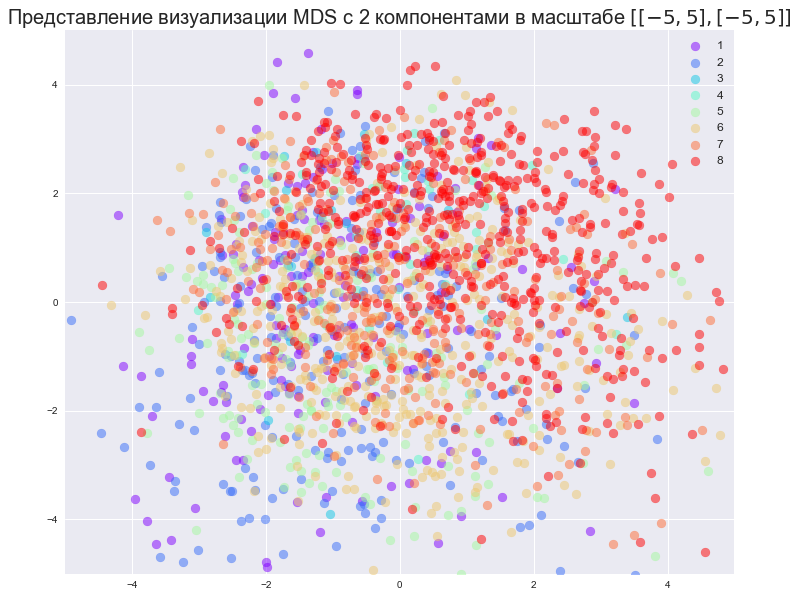

In [39]:
plt.figure(figsize=(12, 10))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed[response_subset.values==y, 0], 
                MDS_transformed[response_subset.values==y, 1], 
                c=c.reshape(1,-1), alpha=0.5, label=str(y), s=80)
plt.title('Представление визуализации MDS с 2 компонентами в масштабе $[[-5, 5], [-5, 5]]$', fontsize=20)
plt.legend(fontsize='large');
plt.xlim(-5, 5)   # масса точек концентрируется в этом масштабе
plt.ylim(-5, 5);   # рекомендуем сначала отобразить визуализацию целиком, а затем раскомментировать эти строки.

In [40]:
MDS_transformed_cos = MDS(random_state=321, dissimilarity='precomputed')\
                         .fit_transform(pairwise_distances(data_subset,
                                                           metric='cosine'))

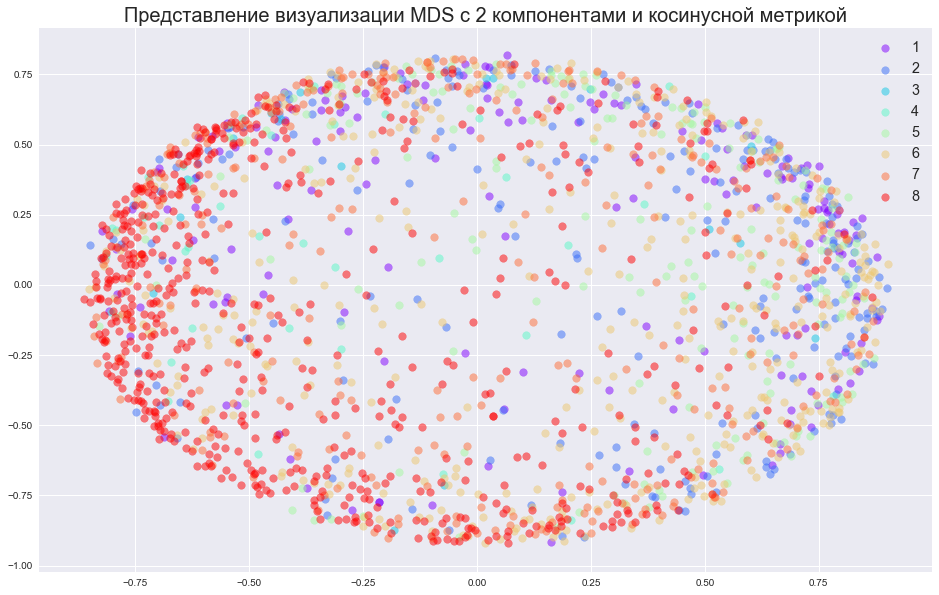

In [45]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
plt.figure(figsize=(16, 10))
plt.title('Представление визуализации MDS с 2 компонентами и косинусной метрикой',
          fontsize=20)
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed_cos[response_subset.values[:subset_l]==y, 0], 
                MDS_transformed_cos[response_subset.values[:subset_l]==y, 1], 
                c=c.reshape(1,-1), alpha=0.5, label=str(y), s=60)
plt.legend(fontsize='x-large');

___
   __Визуализации, на которой классы хорошо разделяются, нет. Даже если разделяющая граница будет нелинейная.__
   
___

   __На всех визуализациях видно, что объекты с наименьшим риском (1 и 2) отличаются от объектов с высоким риском (7 и 8). В каждой из них можно выделить такую область. Причем в каждой визуализации область, в которой объекты классов (7 и 8), будет больше, чем область, в которой объекты классов (1 и 2).__
 
   
___
     
   __На второй визуализации видны выбросы. Как минимум 5 точек стоят далеко от облака точек, сконцентрированного в квадратной области $$[[-5, 5], [-5, 5]]$$__
___

Визуализации разными методами достаточно сильно отличаются, но на каждой можно условно выделить направление, вдоль которого происходит увеличение риска от 1 до 8 (то есть точки постепенно меняют цвет). Если бы это не выполнялось, можно было бы предположить, что задача не решаема.

## Поиск аномалий

Воспользуемся методами поиска аномалий.

__One class SVM__


Для простоты выберем вещественные признаки, которые известны для всех объектов: `Product_Info_4, Ins_Age, Ht, Wt, BMI`. Оставим только те, которые относятся к человеку, то есть не будем рассматривать `Product_Info_4`. Получится, что мы отбираем нестандартных по комбинации вес/рост/возраст людей.

In [46]:
from sklearn import svm

In [47]:
person_features = ["Ins_Age", "Ht", "Wt", "BMI"]

Два ключевых параметра `OC_SVM` - `gamma` и `nu`. Первый влияет на то, как хорошо граница будет приближать данные, второй - сколько точек нужно относить к выбросам.

In [48]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.01) 
svm_.fit(sdata[person_features])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=10, kernel='rbf',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

In [49]:
labels = svm_.predict(sdata[person_features])

In [50]:
(labels==1).mean()

0.9899631195163436

Около 98% объектов не признаются выбросами. 

Попытаемся визуализировать, какие объекты отнесены к шумовым. 

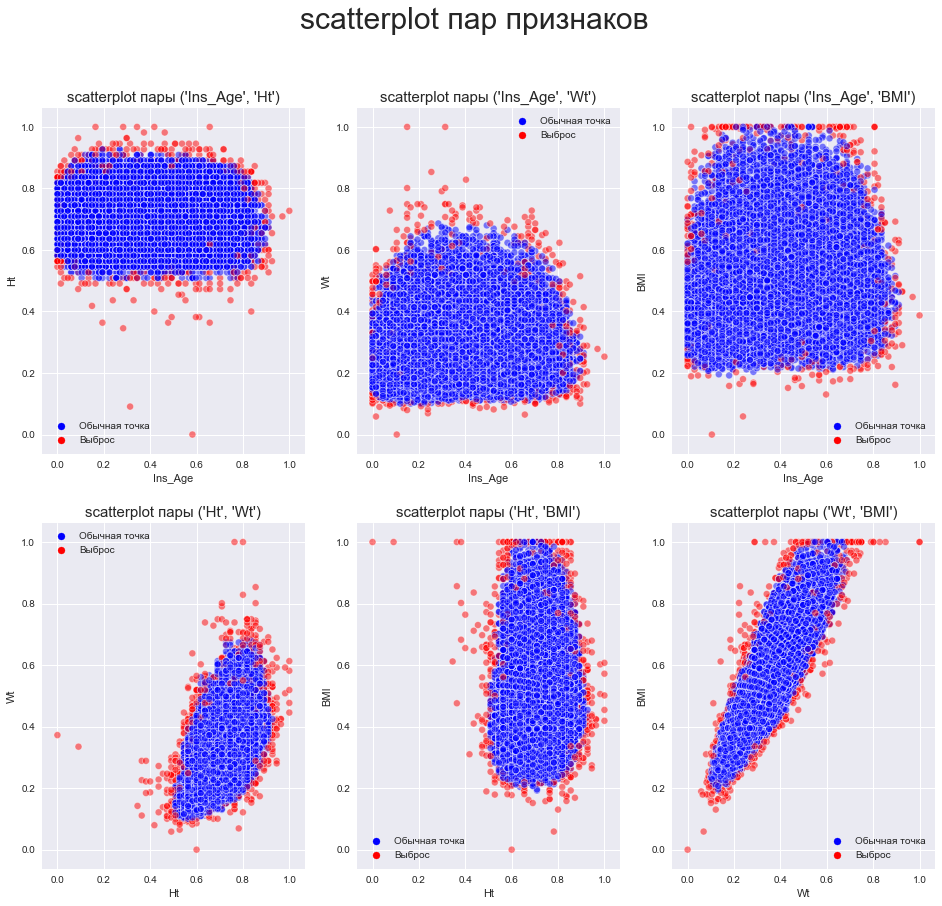

In [151]:
from itertools import product 

fig, axes = plt.subplots(2, 3, figsize=(16, 14))
plt.suptitle('scatterplot пар признаков', fontsize=30);
pairs = [pair for i in range(3) for pair in list(product([person_features[i]],
                                                         person_features[i+1:]))]

for i, pair in enumerate(pairs):
    sns.scatterplot(sdata[pair[0]], sdata[pair[1]], 
                    hue=['Выброс' if label < 0 else 'Обычная точка' for label in labels],
                    ax=axes[i // 3, i % 3], palette=['B', 'R'], 
                    alpha=0.5).set_title('scatterplot пары {}'.format(pair), fontsize=15)

plt.show();

Во-первых, синие точки заполняют почти все облако точек, а во-вторых, красные точки находятся на границе или далеко от облака (интуитивно понятно, что это аномальные объекты). 

__Непараметрическое восстановление плотности.__
Искать аномалии можно, анализируя непараметрически восстановленную плотность одномерного распределения. Так можно заметить, что какие-то объекты выбиваются из общей тенденции. 

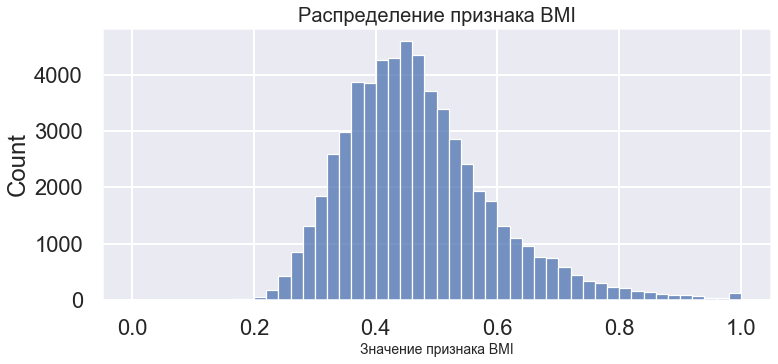

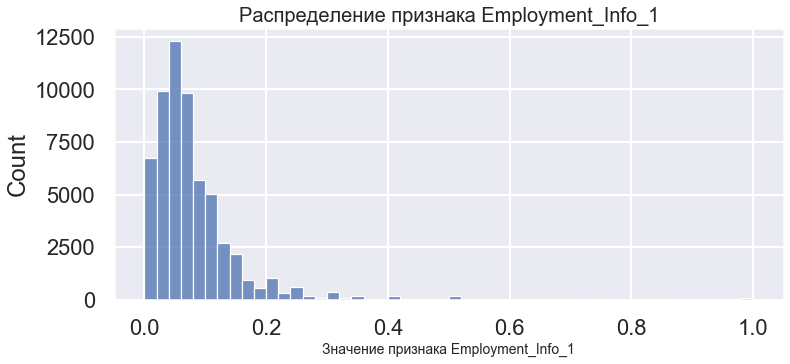

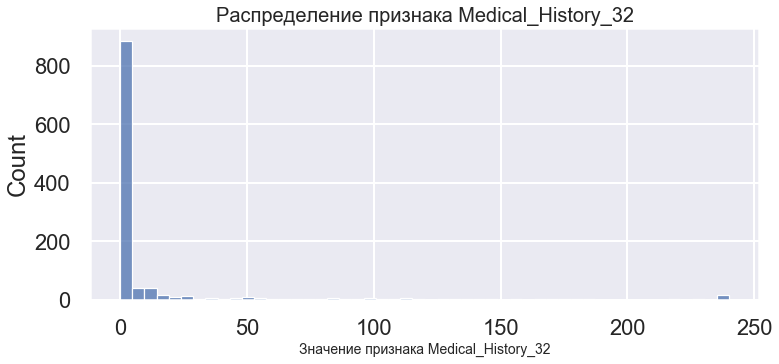

In [48]:
features = ['BMI', 'Employment_Info_1', 'Medical_History_32']
for feature in features:
    plt.figure(figsize=(12, 5))
    sns.histplot(data[feature].dropna(), bins=50)\
    .set_title('Распределение признака {}'.format(feature), fontsize=20)
    plt.xlabel('Значение признака {}'.format(feature), fontsize=14)
    plt.show()

На трех графиках видно, что в конце множества значений признака есть скачок, и это явление очень похоже на аномалию.

## Заключение
Мы познакомились с методами визуализации и отбора шумовых объектов и посмотрели на примере, с чего стоит начинать работу с новым датасетом. Как и в других методах анализа данных, в методах визуализации приходится подбирать параметры, но здесь эта задача осложняется отсутствием автоматически вычисляемого критерия качества визуализации, и подбирать параметры приходится вручную.